In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_excel(r"C:\Users\suman\Downloads\ML Advanced Exam\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")

In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

220

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [9]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3700,490,4345,4345,2376,233,412,544,5625,8182,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026.790289
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4624.849541
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5224.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8266.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12344.750000


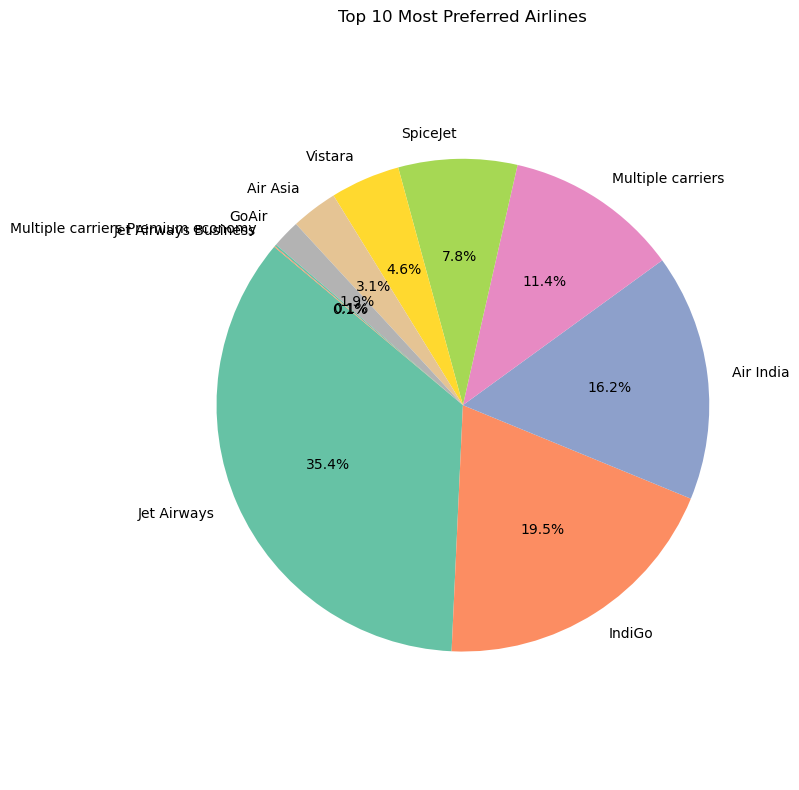

In [10]:
# Most Preferred Airlines - Pie Chart
plt.figure(figsize=(8, 8))
top_airlines = df['Airline'].value_counts().head(10)
plt.pie(top_airlines.values, labels=top_airlines.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top 10 Most Preferred Airlines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

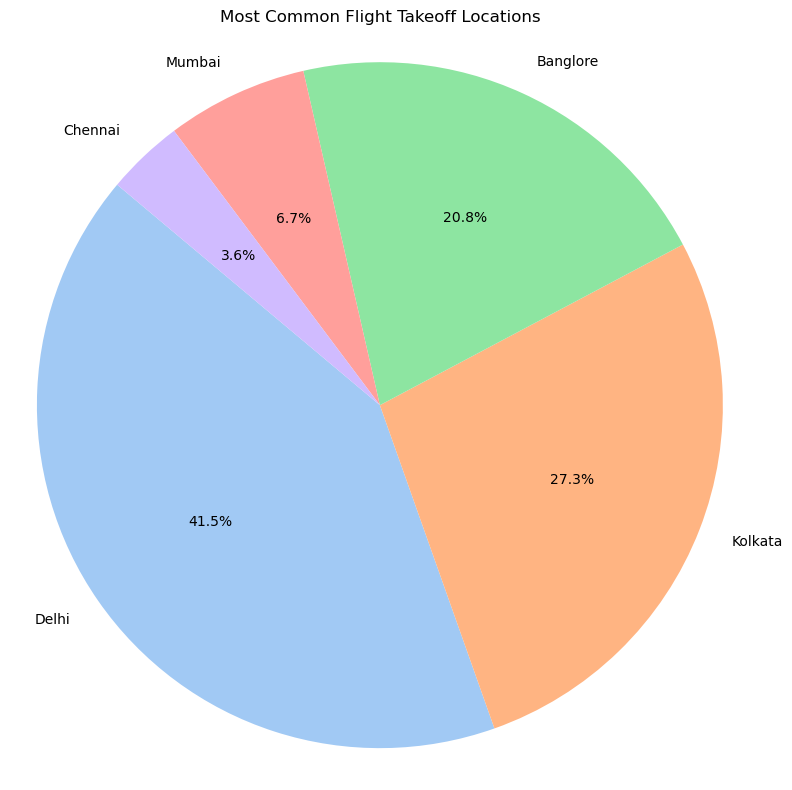

In [11]:
plt.figure(figsize=(8, 8))
source_counts = df['Source'].value_counts()
plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Most Common Flight Takeoff Locations')
plt.axis('equal')
plt.tight_layout()
plt.show()

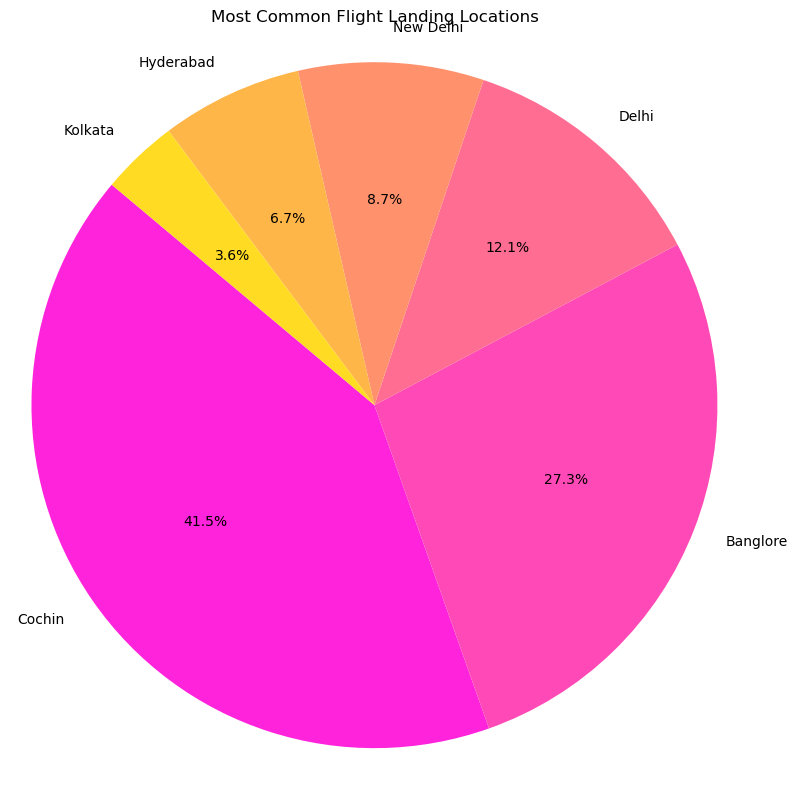

In [12]:
plt.figure(figsize=(8, 8))
destination_counts = df['Destination'].value_counts()
plt.pie(destination_counts.values, labels=destination_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('spring'))
plt.title('Most Common Flight Landing Locations')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
# Extract day, month, year from Date_of_Journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce', dayfirst=True)
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year
df.drop('Date_of_Journey', axis=1, inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4
})

# Drop non-numeric, non-structured columns
df.drop(['Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)


In [16]:
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

In [17]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

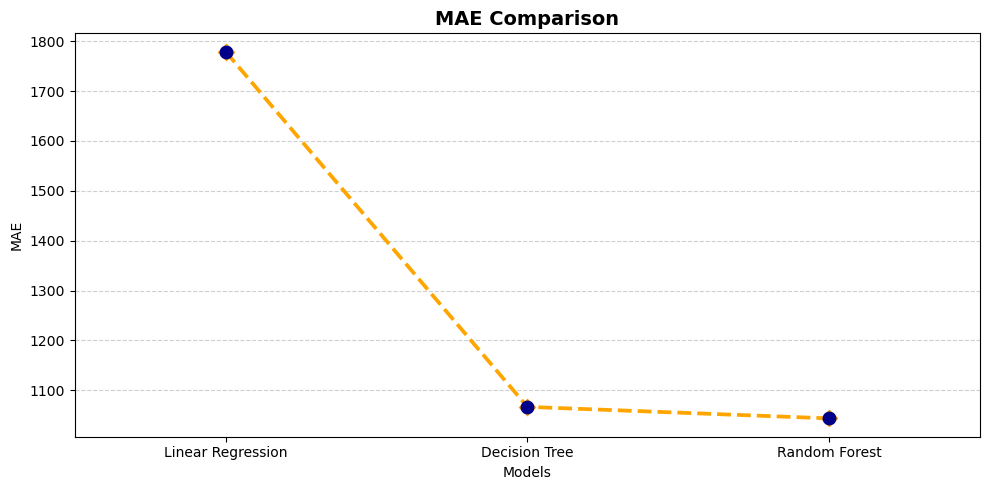

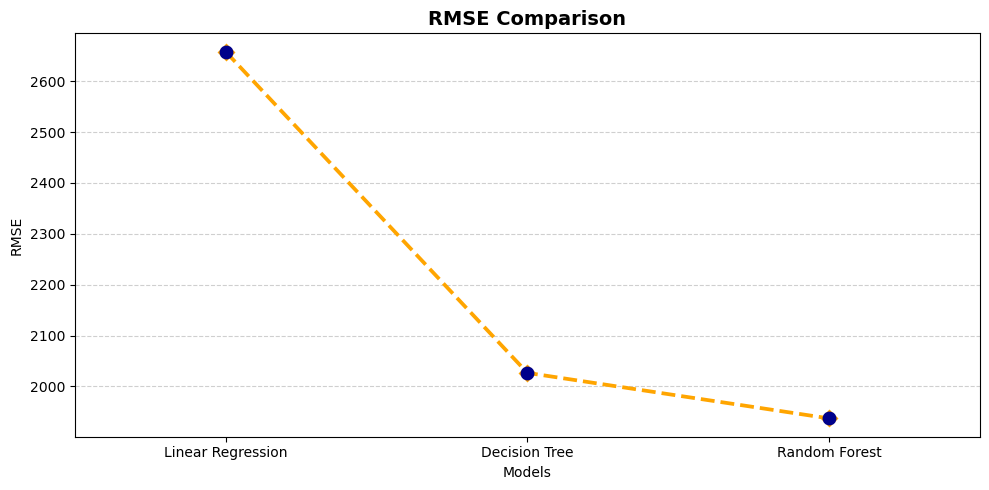

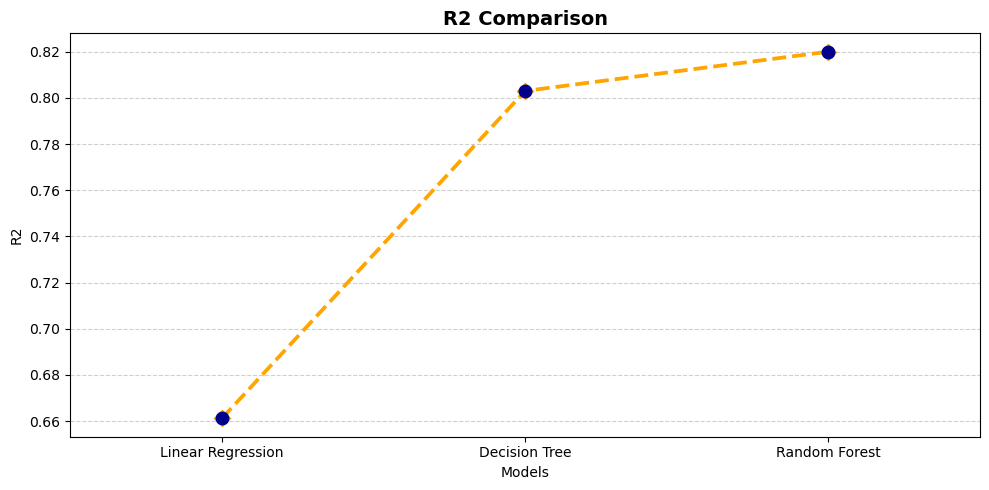

In [20]:

# ------------------- Evaluation Visualizations -------------------
metrics = ['MAE', 'RMSE', 'R2']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.stripplot(x=list(results.keys()), y=[results[m][metric] for m in results], size=10, color='darkblue')
    sns.pointplot(x=list(results.keys()), y=[results[m][metric] for m in results], color='orange', markers='D', linestyles='--')
    plt.title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [21]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", grid.best_params_)
print("Best Cross-Validated R² Score:", grid.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 300}
Best Cross-Validated R² Score: 0.8342


In [41]:
##  Airline with Highest Average Price
avg_price_by_airline = df.groupby('Airline_IndiGo').mean(numeric_only=True)['Price'].sort_values(ascending=False)
print("Airline with Highest Average Price:\n", avg_price_by_airline.head(1))

Airline with Highest Average Price:
 Airline_IndiGo
False    9841.738449
Name: Price, dtype: float64


In [43]:
df_raw = pd.read_excel(r"C:\Users\suman\Downloads\ML Advanced Exam\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")
df_raw['Price'] = df_raw['Price'].replace('Not Available', np.nan)
df_raw.dropna(subset=['Price'], inplace=True)
df_raw['Price'] = pd.to_numeric(df_raw['Price'], errors='coerce')

print("\nAirline with Highest Average Price:")
print(df_raw.groupby('Airline')['Price'].mean().sort_values(ascending=False).head())


Airline with Highest Average Price:
Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Name: Price, dtype: float64


In [44]:
##  Q3.b – Business Class Flights Price > 50K
high_price_business_flights = df[(df['Additional_Info_Business class'] == 1) & (df['Price'] > 50000)]
print("Business Class Flights with Price > 50K:\n", high_price_business_flights[['Price']].describe())

Business Class Flights with Price > 50K:
               Price
count      3.000000
mean   66382.666667
std    11665.823003
min    57209.000000
25%    59818.000000
50%    62427.000000
75%    70969.500000
max    79512.000000


In [47]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [48]:
## Q7 – Business Conclusion & Pipeline for Test Data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

# Load test data
test_df = pd.read_excel(r"C:\Users\suman\Downloads\ML Advanced Exam\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")

# Feature Engineering on Test Data
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'], errors='coerce', dayfirst=True)
test_df['Journey_Day'] = test_df['Date_of_Journey'].dt.day
test_df['Journey_Month'] = test_df['Date_of_Journey'].dt.month
test_df['Journey_Year'] = test_df['Date_of_Journey'].dt.year
test_df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

test_df['Total_Stops'] = test_df['Total_Stops'].map({
    'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4
})

# Encoding (must align with train data)
test_df_encoded = pd.get_dummies(test_df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

# Align test columns with train columns
test_df_encoded = test_df_encoded.reindex(columns=X.columns, fill_value=0)

# Predict using best model
best_model = grid.best_estimator_
test_predictions = best_model.predict(test_df_encoded)
print("Test Predictions:\n", test_predictions[:10])

Test Predictions:
 [ 6031.45073675 13099.31691934 13724.92282921  6032.97243254
 13115.8613373   3884.69175    11087.         26050.8123401
 11087.         10045.15786298]


## 1.Jet Airways is the most preferred airline in the dataset, indicating strong brand presence or pricing strategy.
## 2.Delhi and Cochin are the top source and destination airports, suggesting high passenger volume in these cities.
## 3.Flight price is heavily influenced by airline, source/destination, number of stops, and date of journey.
## 4.Among tested models:
##   ->Random Forest Regressor provided the best predictive performance.
##   ->After hyperparameter tuning, the R² score improved, making it reliable for production deployment.
## 5.Business Class flights are significantly more expensive, and flights priced over ₹50,000 are rare but exist—indicating a niche premium customer segment.
## 6.With better pricing prediction, airlines can optimize revenue management, predict demand-based pricing, and offer targeted discounts or upgrades.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
rfm_df = pd.read_csv(r"C:\Users\suman\Downloads\ML Advanced Exam\ML Advanced Exam Paper\Dataset\RFM Dataset\RFM data.csv")

In [25]:
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])

In [26]:
snapshot_date = rfm_df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [27]:
# Step 1: Calculate RFM metrics
rfm = rfm_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

In [28]:
rfm.isnull().sum()

CustomerID     0
InvoiceDate    0
InvoiceNo      0
TotalPrice     0
dtype: int64

In [29]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 2: Assign RFM scores
# a) Recency scoring (manual binning)
rfm['R_Score'] = pd.cut(
    rfm['Recency'],
    bins=[-1, 30, 60, 90, 180, 365],
    labels=[5, 4, 3, 2, 1]
).astype('float').fillna(1).astype(int)

In [30]:
rfm.duplicated().sum()

0

In [32]:
import pandas as pd
from datetime import datetime

# Load data
rfm_df = pd.read_csv(r"C:\Users\suman\Downloads\ML Advanced Exam\ML Advanced Exam Paper\Dataset\RFM Dataset\RFM data.csv")
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])

# Reference date: 1 day after last transaction
reference_date = rfm_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = rfm_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Assign RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combine into RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define segment function
def segment_customer(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 4 and 2 <= f <= 3 and 2 <= m <= 3:
        return 'Potential Loyalist'
    elif r >= 4 and f <= 2 and m <= 2:
        return 'Recent Customers'
    elif r >= 4 and f <= 2 and m <= 2:
        return 'Promising'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Needs Attention'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'About to Sleep'
    elif 2 <= r <= 5 and f <= 3 and m <= 3:
        return 'At Risk'
    elif r <= 3 and f >= 4 and m >= 4:
        return "Can't Lose Them"
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    else:
        return 'Others'

# Apply segmentation
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# View results
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     12347.0        2          7   4060.40        5        5        5   
1     12348.0       75          4   1437.24        2        4        4   
2     12349.0       19          1   1417.60        4        1        4   
3     12350.0      310          1    294.40        1        1        2   
4     12352.0       36          7   1385.74        3        5        4   

  RFM_Score          Segment  
0       555        Champions  
1       244  Can't Lose Them  
2       414           Others  
3       112   About to Sleep  
4       354  Loyal Customers  


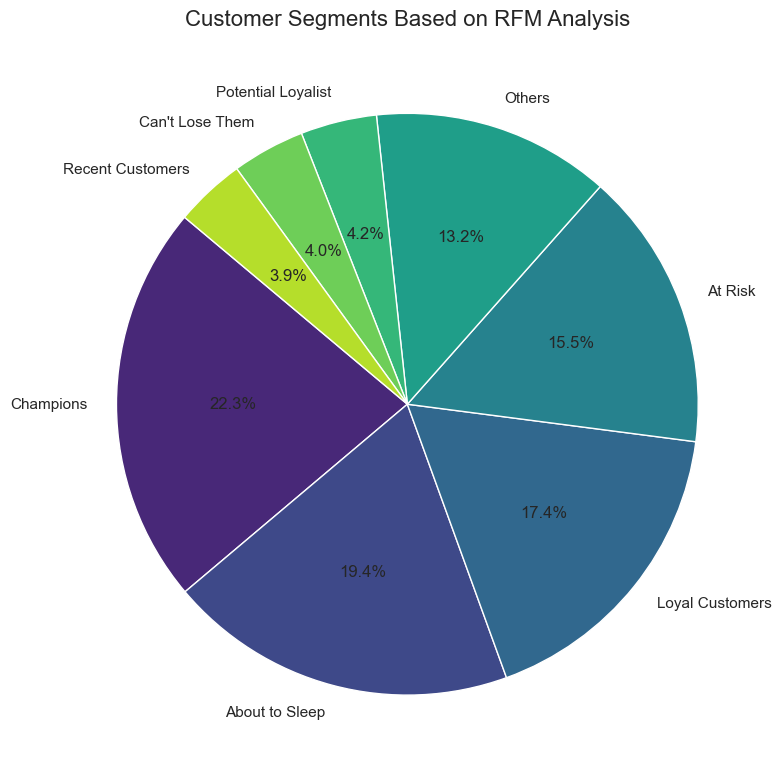

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count of customers per segment
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=False)

# Plot the distribution of customer segments using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(segment_counts)))
plt.title('Customer Segments Based on RFM Analysis', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


# -->>Key Segments Identified:
# -Champions (high R, F, M): Customers who are the most engaged, frequent buyers, and high spenders.
# -Loyal Customers (moderate-high RFM): Customers who buy regularly but might need incentives to increase spending or engagement.
# -Potential Loyalists (high recency, moderate F and M): New customers who have the potential to become loyal with the right strategies.
# -Recent Customers (very recent, low frequency/spending): New customers who might need extra attention to become repeat buyers.
# -At Risk (low recency, high frequency/spending): Customers who haven’t bought in a while but have previously been valuable.
# -Hibernating (low recency, frequency, and spending): Customers showing minimal activity — may need reactivation campaigns.
# -->>Strategic Implications:
# -Champions should be rewarded with loyalty programs and exclusive deals to maintain engagement.
# -Loyal Customers benefit from targeted cross-selling and personalized offers.
# -Potential Loyalists require nurturing with discounts and engagement incentives to foster loyalty.
# -At Risk and Recent Customers should be targeted with re-engagement campaigns, such as discounts or personalized messages.
# -Hibernating customers need to be identified early for reactivation strategies or removed from active targeting.
# -->>Visualization Insights:
# -Segment distribution helps to prioritize resources on high-value customers (Champions and Loyal) while focusing on re-engaging less active ones (At Risk and Hibernating).